Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale
%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_normals_int.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

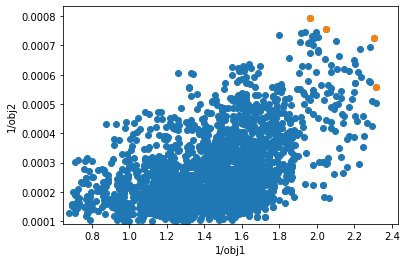

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


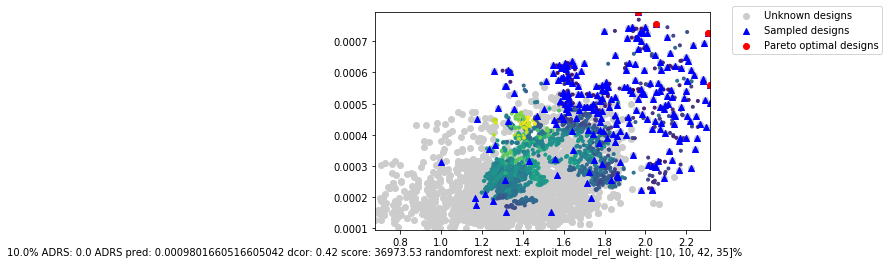

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1423, 1398, 1399,  752,  750,    0,   35,  382,   14,    7,  105,
       2233,  140,  475,  440, 1067, 1675, 1102, 1136, 1701,  174,  209,
        112,  141,    1,  106,    2, 1678,    3,    4,  108,  142, 2130,
       1068, 1069,  441,  442, 1070,  107, 1676, 1677, 1103, 1702,  443,
       1071, 1204, 1224,  476, 1104,  444,  477, 1105,  573,  144,  145,
        479, 1106, 1705,  109, 1703, 2145,   38, 1223, 1793, 1227, 2175,
        143,  212, 2228,  478, 1704,    5,    6, 2153,  110,  445, 1072,
         11,   10, 1139,  513, 2146,    8,  150, 1259,  446, 1107,  213,
       1137, 1168, 2221,  542, 1169, 1167,  510, 1198,  543, 1751, 2167,
       1752, 2188, 1753,  549,  544, 1729, 2161, 2234, 2236, 1138, 1754,
        147,  148, 2162,  672, 1318, 2160, 1258, 1755,  545, 2154,  210,
        642, 1795,  211, 1730,  575, 2217, 1861,  512,  111, 1170, 1320,
       1073, 1201,  151, 1263, 1679, 1140, 1706, 1230,  480,  146, 1763,
         13,  481,  514,  546, 1171,  676, 1776, 11